# Convolutional Neural Networks for Image Classification:

## MNIST Dataset: handwritten digits

In [1]:
from keras.datasets import mnist

Using TensorFlow backend.


In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
x_train.shape

(60000, 28, 28)

There is not color channel yet, we have to reshape

In [5]:
single_image = x_train[0]

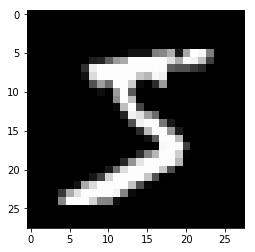

In [6]:
plt.imshow(single_image, cmap='gray')

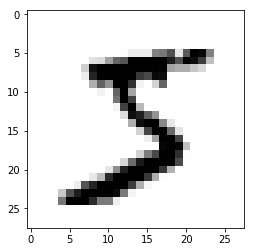

In [7]:
plt.imshow(single_image, cmap='gray_r')

Target variable:

In [8]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

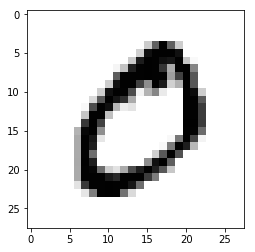

In [9]:
plt.imshow(x_train[1], cmap='gray_r')

Need to reshape also y_train

In [10]:
y_train.shape

(60000,)

Make y categorical

In [11]:
from keras.utils.np_utils import to_categorical

In [12]:
y_cat_test = to_categorical(y_test,10)
y_cat_train = to_categorical(y_train,10)

In [13]:
y_cat_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

The number 5 from the first orginal data

In [14]:
y_cat_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [15]:
# single_image

# Data Normalization

In [16]:
single_image.max()

255

In [17]:
x_train = x_train / x_train.max()

In [18]:
x_test = x_test / x_test.max()

In [19]:
scaled_image = x_train[0]

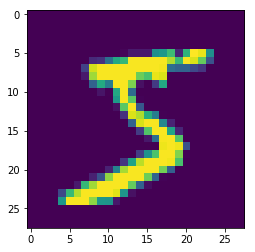

In [20]:
# scaled_image
plt.imshow(scaled_image)

# Reshape Data

In [21]:
x_train.shape

(60000, 28, 28)

In [22]:
x_train = x_train.reshape(60000, 28, 28, 1)

In [23]:
x_train.shape

(60000, 28, 28, 1)

In [24]:
x_test.shape

(10000, 28, 28)

In [25]:
x_test = x_test.reshape(10000, 28, 28, 1)

In [26]:
x_test.shape

(10000, 28, 28, 1)

# CNN Model

In [27]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [28]:
model = Sequential()

# Convolutional layer
model.add(Conv2D(filters=32, kernel_size=(4,4), input_shape=(28, 28, 1), activation='relu'))

# Pooling layer
model.add(MaxPool2D(pool_size=(2, 2)))

# From 2D to 1D
model.add(Flatten())

# Dense layer
model.add(Dense(128, activation='relu'))


# output layer: CLASSIFIER
model.add(Dense(10, activation='softmax'))

# Compile
model.compile(loss='categorical_crossentropy',
             optimizer='rmsprop',
             metrics = ['accuracy'])

In [29]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 25, 25, 32)        544       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               589952    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 591,786
Trainable params: 591,786
Non-trainable params: 0
_________________________________________________________________


## Training the model

In [30]:
model.fit(x_train, y_cat_train, epochs=2)

Epoch 1/2
60000/60000 [==============================] - 169s 3ms/step - loss: 0.1396 - acc: 0.9573
Epoch 2/2
60000/60000 [==============================] - 142s 2ms/step - loss: 0.0487 - acc: 0.9855


In [31]:
model.metrics_names

['loss', 'acc']

# Test performance

In [32]:
model.evaluate(x_test, y_cat_test)

10000/10000 [==============================] - 12s 1ms/step


[0.036401387778029315, 0.9884]

# Predicting new images

In [33]:
from sklearn.metrics import classification_report

In [34]:
predictions = model.predict_classes(x_test)

Correct answers: `y_cat_test` in the format of `y_test`

In [36]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [37]:
predictions

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [38]:
print(classification_report(y_test, predictions))

             precision    recall  f1-score   support

          0       0.99      0.99      0.99       980
          1       1.00      0.99      0.99      1135
          2       0.99      0.99      0.99      1032
          3       0.98      1.00      0.99      1010
          4       0.99      0.99      0.99       982
          5       0.99      0.98      0.99       892
          6       0.99      0.99      0.99       958
          7       0.99      0.98      0.99      1028
          8       0.97      0.99      0.98       974
          9       0.99      0.98      0.98      1009

avg / total       0.99      0.99      0.99     10000

